### Netflix EDA Project
### Exploratory Data Analysis on Netflix Movies and TV Shows Dataset

In [6]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid')

In [7]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Basic Info & Cleaning

In [8]:
# Shape and column types
df.shape, df.dtypes

((8807, 12),
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object)

In [9]:
# Null values check
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

 Cleaning Steps

    Handle missing values
    Convert 'date_added' to datetime
    Clean up 'duration'



In [13]:
#Convert 'date_added' to Datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [14]:
#Fix Missing Values
# Fill missing values for 'country' and 'director' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

In [15]:
# Null values check
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
df['duration_minutes'] = df['duration'].apply(lambda x: pd.to_numeric(x.replace(' min', ''), errors='coerce') if isinstance(x, str) and 'min' in x else None)
df['duration_seasons'] = df['duration'].apply(lambda x: pd.to_numeric(x.replace(' seasons', ''), errors='coerce') if isinstance(x, str) and 'seasons' in x else None)

# Display cleaned data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,None
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,None
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,None
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,None


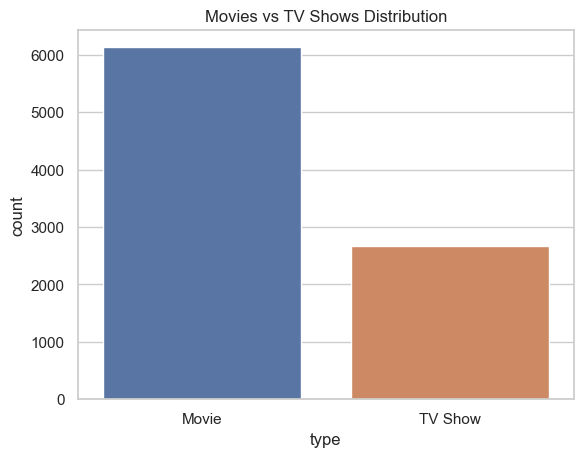

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Movies vs TV Shows
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows Distribution')
plt.show()


In [19]:
# Most common genres
genre_counts = df['listed_in'].str.split(',').explode().value_counts().head(10)


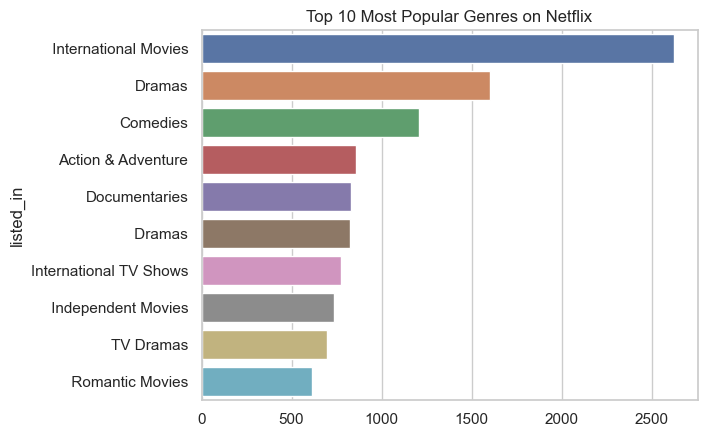

In [20]:
# Plot the top 10 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Popular Genres on Netflix')
plt.show()

In [28]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
mean_value = df['rating'].mean()


In [32]:
mean_rating_by_listed_in = (
    df
    .groupby('listed_in')['rating']      # group ratings by genre
    .mean()                          # compute the mean for each group
    .reset_index(name='avg_rating')  # turn it back into a DataFrame
)

print(mean_rating_by_listed_in)

                                             listed_in  avg_rating
0                                   Action & Adventure         NaN
1                   Action & Adventure, Anime Features         NaN
2    Action & Adventure, Anime Features, Children &...         NaN
3    Action & Adventure, Anime Features, Classic Mo...         NaN
4    Action & Adventure, Anime Features, Horror Movies         NaN
..                                                 ...         ...
509             TV Horror, TV Mysteries, Teen TV Shows         NaN
510                           TV Horror, Teen TV Shows         NaN
511                  TV Sci-Fi & Fantasy, TV Thrillers         NaN
512                                           TV Shows         NaN
513                                          Thrillers         NaN

[514 rows x 2 columns]


In [33]:
mean_rating_by_listed_in = mean_rating_by_listed_in.sort_values(
    by='avg_rating', ascending=False
)


## Movies vs TV Shows by Year

In [34]:
# Group by year and type (Movies/TV Shows)
df['year_added'] = df['date_added'].dt.year
year_type_counts = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

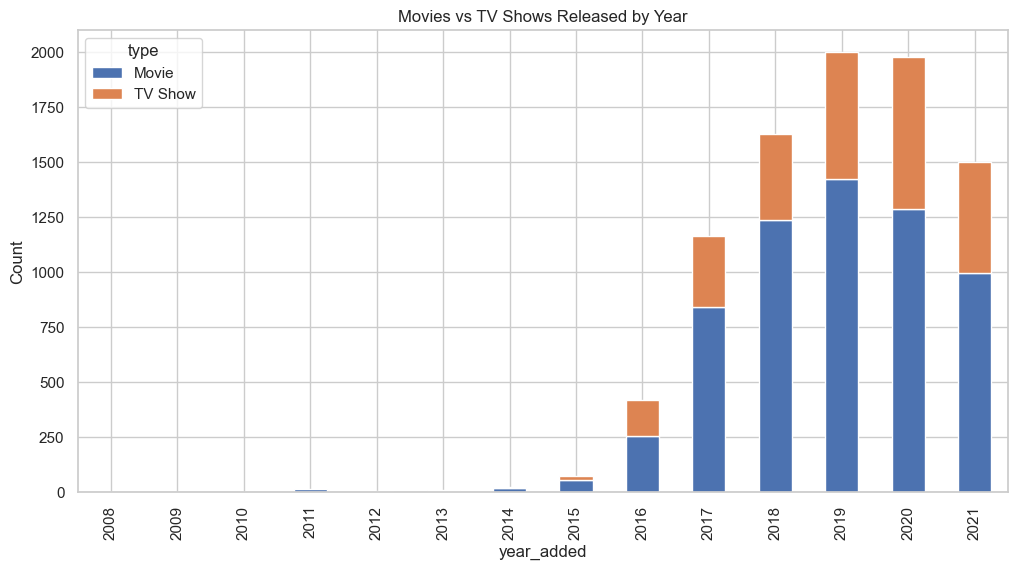

In [35]:
# Plot Movies vs TV Shows by year
year_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Movies vs TV Shows Released by Year')
plt.ylabel('Count')
plt.show()

### Top Countries by Number of Shows/Movies

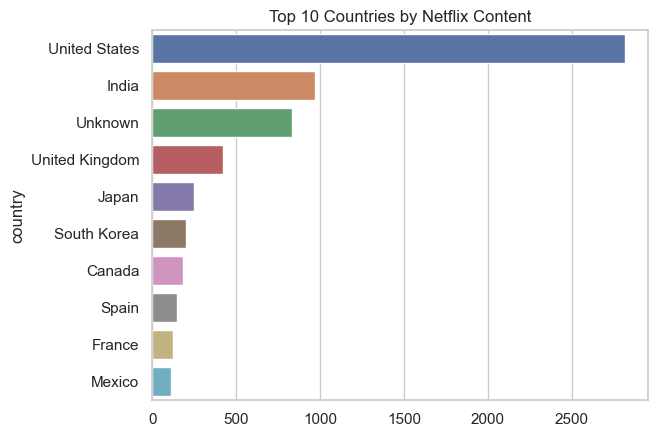

In [36]:
# Count the number of shows per country
country_counts = df['country'].value_counts().head(10)

# Plot the top 10 countries by number of shows/movies
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Netflix Content')
plt.show()
